# Proyek Analisis Data: [Air Quality Dataset]
- **Nama:** [Ahmad Mukhlis Ilham Rizky]
- **Email:** [mutis20139@gmail.com]
- **ID Dicoding:** [ahmmukhlis]

## Menentukan Pertanyaan Bisnis

- Berapa nilai polutan tertinggi (hour, day, and year average) dan station mana yang memiliki nilai tersebut?
- Apa pengaruh kecepatan angin (WSPM) terhadap polutan (NO2 dan PM10)? 

## Import Semua Packages/Library yang Digunakan

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import os

## Data Wrangling

### Gathering Data

In [49]:
folder_path = 'data'
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

In [50]:
df_list = []
for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    df = pd.read_csv(file_path)
    df_list.append(df)

In [51]:
AllData_df = pd.concat(df_list, ignore_index=True)

In [52]:
AllData_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


**Insight:**
- Data setiap station (total: 12 station) memiliki rentang waktu 2013/03/01-2017/02/28
- Komponen polutan: PM2.5, PM10, SO2, NO2, CO, dan O3; Parameter terkait: TEMP, PRES, DEWP, RAIN, wd, dan WSPM
- Batas minimum China air quality berdasarkan paper https://doi.org/10.1016/j.jes.2022.03.036 & regulasi peraturan terkait sbb:
  A = Average   h = hour   Y = Year
  (PM2.5 => 1h A = 75   ; 24h A = 45)
  (PM10  =>               24h A = 150  ; Y A = 70)
  (SO2   => 1h A = 500  ; 24h A = 450  ; Y A = 60)
  (NO2   => 1h A = 2000 ; 24h A = 80  ; Y A = 40)
  (CO    => 1h A = 4000 ; 24h A = 10000)
  (O3    => 1h A = 200  ; 8h max = 160)
  

### Assessing Data

In [53]:
AllData_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [54]:
AllData_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [55]:
AllData_df.isna().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [56]:
print("Null count by station:") #Total null value berdasarkan station
null_by_station = AllData_df.groupby('station').apply(lambda x: x.isna().sum())
print(null_by_station)

Null count by station:
               No  year  month  day  hour  PM2.5  PM10   SO2   NO2    CO  \
station                                                                    
Aotizhongxin    0     0      0    0     0    925   718   935  1023  1776   
Changping       0     0      0    0     0    774   582   628   667  1521   
Dingling        0     0      0    0     0    779   656   730  1234  2012   
Dongsi          0     0      0    0     0    750   553   663  1601  3197   
Guanyuan        0     0      0    0     0    616   429   474   659  1753   
Gucheng         0     0      0    0     0    646   381   507   668  1401   
Huairou         0     0      0    0     0    953   777   980  1639  1422   
Nongzhanguan    0     0      0    0     0    628   440   446   692  1206   
Shunyi          0     0      0    0     0    913   548  1296  1365  2178   
Tiantan         0     0      0    0     0    677   597  1118   744  1126   
Wanliu          0     0      0    0     0    382   284   575  107

C:\Users\acer\AppData\Local\Temp\ipykernel_17532\3662581166.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  null_by_station = AllData_df.groupby('station').apply(lambda x: x.isna().sum())


In [57]:
print("Jumlah duplikasi: ",AllData_df.duplicated().sum()) #Total data terduplikasi

Jumlah duplikasi:  0


In [58]:
AllData_df.select_dtypes(include=[np.number]).max()

No       35064.0
year      2017.0
month       12.0
day         31.0
hour        23.0
PM2.5      999.0
PM10       999.0
SO2        500.0
NO2        290.0
CO       10000.0
O3        1071.0
TEMP        41.6
PRES      1042.8
DEWP        29.1
RAIN        72.5
WSPM        13.2
dtype: float64

In [59]:
AllData_df[AllData_df['PM2.5'] == AllData_df['PM2.5'].max()] #outliers PM2.5

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
411482,25779,2016,2,8,2,999.0,NaN,299.0,82.0,2700.0,6.0,-1.6,1009.9,-15.1,0.0,SW,1.1,Wanshouxigong


In [60]:
AllData_df[AllData_df['PM10'] == AllData_df['PM10'].max()] #outliers PM10

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
42951,7888,2014,1,23,15,NaN,999.0,137.0,122.0,3800.0,10.0,3.2,1004.1,-13.2,0.0,SE,1.5,Changping
146075,5820,2013,10,29,11,NaN,999.0,9.0,25.0,700.0,43.0,15.3,1022.8,-3.1,0.0,N,3.7,Guanyuan
299132,18621,2015,4,15,20,88.0,999.0,2.0,13.0,300.0,79.0,18.9,1000.0,-1.0,0.0,NNW,4.3,Shunyi


In [61]:
AllData_df[AllData_df['O3'] == AllData_df['O3'].max()] # Cek outliers O3

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
109223,4032,2013,8,15,23,195.0,206.0,6.0,40.0,1600.0,1071.0,29.5,995.6,25.3,2.2,SSE,3.3,Dongsi
109224,4033,2013,8,16,0,203.0,206.0,6.0,34.0,1500.0,1071.0,27.2,995.5,24.7,0.3,SSW,2.9,Dongsi
109241,4050,2013,8,16,17,206.0,267.0,7.0,65.0,2000.0,1071.0,30.1,992.8,28.5,0.0,E,1.4,Dongsi
109242,4051,2013,8,16,18,207.0,273.0,8.0,85.0,2200.0,1071.0,30.0,993.3,28.4,0.0,ENE,1.5,Dongsi
109243,4052,2013,8,16,19,187.0,222.0,8.0,86.0,2100.0,1071.0,29.5,993.6,28.4,0.0,ESE,1.2,Dongsi
109244,4053,2013,8,16,20,202.0,232.0,7.0,98.0,3300.0,1071.0,28.9,994.5,28.2,0.0,SSE,0.6,Dongsi
109245,4054,2013,8,16,21,202.0,242.0,7.0,95.0,3100.0,1071.0,28.8,994.1,28.3,0.5,SE,1.1,Dongsi
109246,4055,2013,8,16,22,198.0,233.0,7.0,102.0,2300.0,1071.0,28.4,994.1,28.1,0.0,E,0.8,Dongsi
109247,4056,2013,8,16,23,201.0,219.0,8.0,118.0,2700.0,1071.0,28.3,994.0,28.0,0.1,E,1.0,Dongsi
109248,4057,2013,8,17,0,197.0,198.0,9.0,101.0,2300.0,1071.0,28.2,993.7,27.9,0.0,NE,1.6,Dongsi


**Insight:**
- Inaccurate values: PM2.5 (3), PM10 (1) dengan nilai max value yaitu 999 (outliers)
- Data terbebas dari duplikasi
- Total null/missing value

| Station         | No | Year | Month | Day | Hour | PM2.5 | PM10 | SO2 | NO2 | CO  | O3   | TEMP | PRES | DEWP | RAIN | wd  | WSPM | Station |
|------------------|----|------|-------|-----|------|-------|------|-----|-----|-----|------|------|------|------|------|-----|------|--------|
| Aotizhongxin     | 0  | 0    | 0     | 0   | 0    | 925   | 718  | 935 | 1023| 1776| 1719 | 20   | 20   | 20   | 20   | 81  | 14   | 0      |
| Changping        | 0  | 0    | 0     | 0   | 0    | 774   | 582  | 628 | 667 | 1521| 604  | 53   | 50   | 53   | 51   | 140 | 43   | 0      |
| Dingling         | 0  | 0    | 0     | 0   | 0    | 779   | 656  | 730 | 1234| 2012| 1214 | 53   | 50   | 53   | 51   | 140 | 43   | 0      |
| Dongsi           | 0  | 0    | 0     | 0   | 0    | 750   | 553  | 663 | 1601| 3197| 664  | 20   | 20   | 20   | 20   | 78  | 14   | 0      |
| Guanyuan         | 0  | 0    | 0     | 0   | 0    | 616   | 429  | 474 | 659 | 1753| 1173 | 20   | 20   | 20   | 20   | 81  | 14   | 0      |
| Gucheng          | 0  | 0    | 0     | 0   | 0    | 646   | 381  | 507 | 668 | 1401| 729  | 51   | 50   | 51   | 43   | 159 | 42   | 0      |
| Huairou          | 0  | 0    | 0     | 0   | 0    | 953   | 777  | 980 | 1639| 1422| 1151 | 51   | 53   | 53   | 55   | 302 | 49   | 0      |
| Nongzhanguan     | 0  | 0    | 0     | 0   | 0    | 628   | 440  | 446 | 692 | 1206| 506  | 20   | 20   | 20   | 20   | 78  | 14   | 0      |
| Shunyi           | 0  | 0    | 0     | 0   | 0    | 913   | 548  | 1296| 1365| 2178| 1489 | 51   | 51   | 54   | 51   | 483 | 44   | 0      |
| Tiantan          | 0  | 0    | 0     | 0   | 0    | 677   | 597  | 1118| 744 | 1126| 843  | 20   | 20   | 20   | 20   | 78  | 14   | 0      |
| Wanliu           | 0  | 0    | 0     | 0   | 0    | 382   | 284  | 575 | 1070| 1812| 2107 | 20   | 20   | 20   | 20   | 123 | 14   | 0      |
| Wanshouxigong    | 0  | 0    | 0     | 0   | 0    | 696   | 484  | 669 | 754 | 1297| 1078 | 19   | 19   | 19   | 19   | 79  | 13   | 0      |

### Cleaning Data

#### Cleaning data 1 (inaccurate value [outliers])

In [62]:
AllData_df['PM2.5'] = AllData_df['PM2.5'].replace(AllData_df['PM2.5'].max(), AllData_df['PM2.5'].median()) #Replace max value PM 2.5 dengan median

In [63]:
AllData_df['PM10'] = AllData_df['PM10'].replace(AllData_df['PM10'].max(), AllData_df['PM10'].median()) #Replace max value PM 10 dengan median

In [64]:
AllData_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.791137,104.595978,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.809713,91.740882,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,957.000000,995.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [65]:
AllData_df[AllData_df['PM2.5'] == AllData_df['PM2.5'].max()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
376418,25779,2016,2,8,2,957.0,NaN,282.0,92.0,1600.0,7.0,-3.6,1008.2,-14.7,0.0,SW,0.6,Wanliu


In [66]:
AllData_df[AllData_df['PM10'] == AllData_df['PM10'].max()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
273338,27891,2016,5,6,2,283.0,995.0,2.0,10.0,200.0,73.0,17.9,1006.0,-9.1,0.0,NW,2.3,Nongzhanguan


**Insight:**
- Max value PM2.5 dan PM10 (outliers dengan value = 999) diganti dengan nilai median masing-masing polutan

#### Cleaning data 2 (missing value)

In [67]:
AllData_df['Date'] = pd.to_datetime(AllData_df[['year', 'month', 'day']])

In [68]:
AllData_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 19 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   No       420768 non-null  int64         
 1   year     420768 non-null  int64         
 2   month    420768 non-null  int64         
 3   day      420768 non-null  int64         
 4   hour     420768 non-null  int64         
 5   PM2.5    412029 non-null  float64       
 6   PM10     414319 non-null  float64       
 7   SO2      411747 non-null  float64       
 8   NO2      408652 non-null  float64       
 9   CO       400067 non-null  float64       
 10  O3       407491 non-null  float64       
 11  TEMP     420370 non-null  float64       
 12  PRES     420375 non-null  float64       
 13  DEWP     420365 non-null  float64       
 14  RAIN     420378 non-null  float64       
 15  wd       418946 non-null  object        
 16  WSPM     420450 non-null  float64       
 17  station  4

In [69]:
AllData_df.isna().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
Date           0
dtype: int64

In [70]:
AllData_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,Date
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01


In [71]:
AllData_interpolated_df = AllData_df.copy() #Interpolasi untuk mengisi missing values

columns_to_interpolate = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

for col in columns_to_interpolate:
    AllData_interpolated_df[col] = AllData_interpolated_df[col].interpolate(method='slinear')

for col in columns_to_interpolate:
    AllData_interpolated_df = AllData_interpolated_df.rename(columns={col: f"{col}_interpolated"})

AllData_Combined_df = pd.concat([AllData_df, AllData_interpolated_df], axis=1)

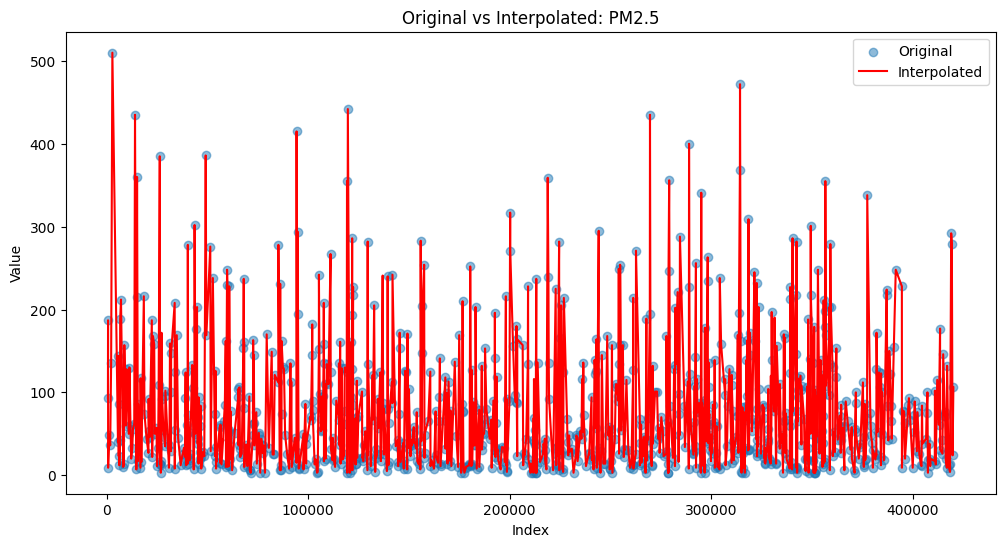

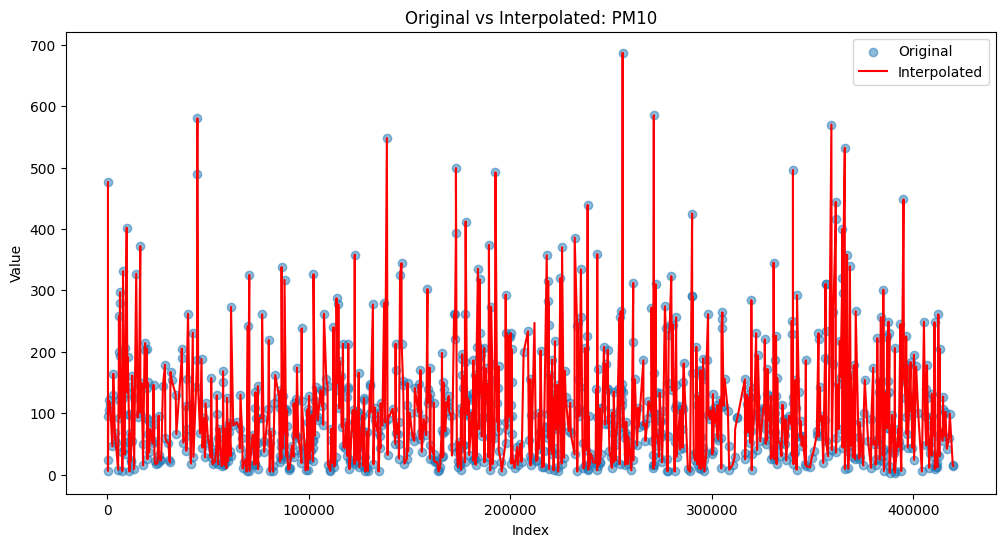

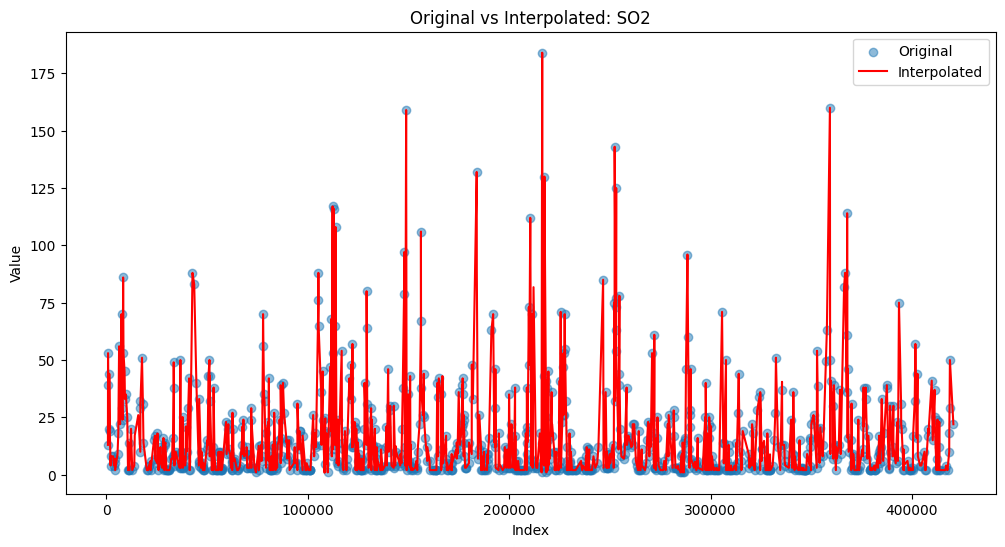

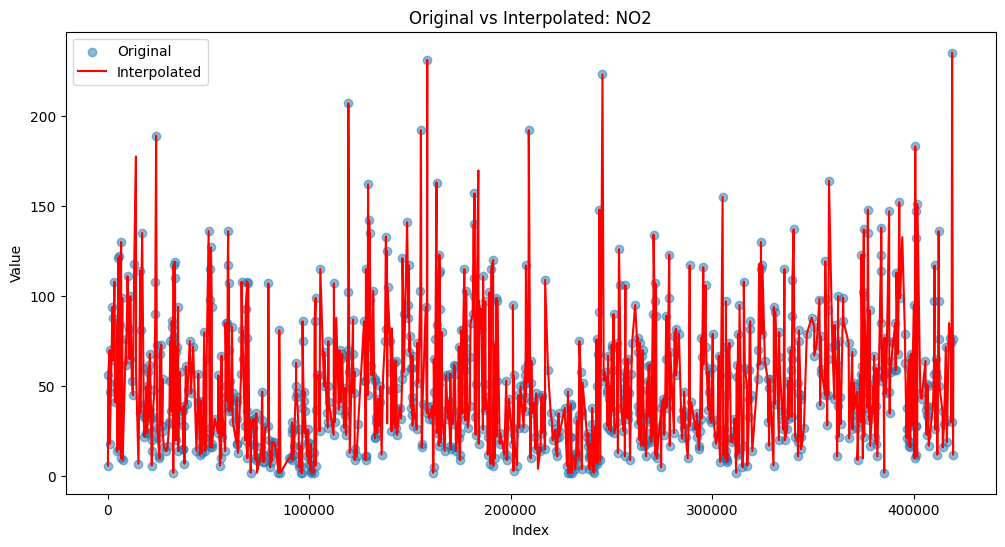

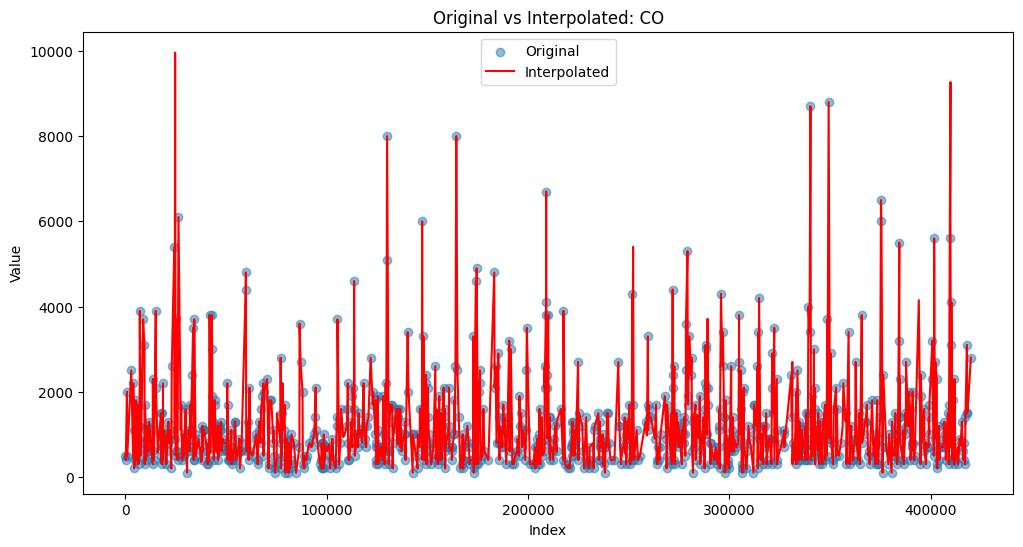

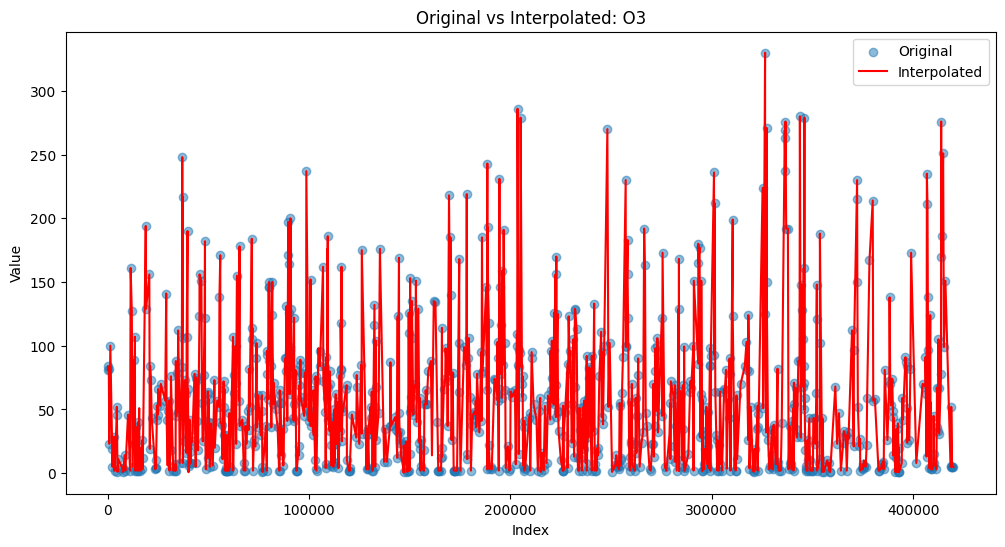

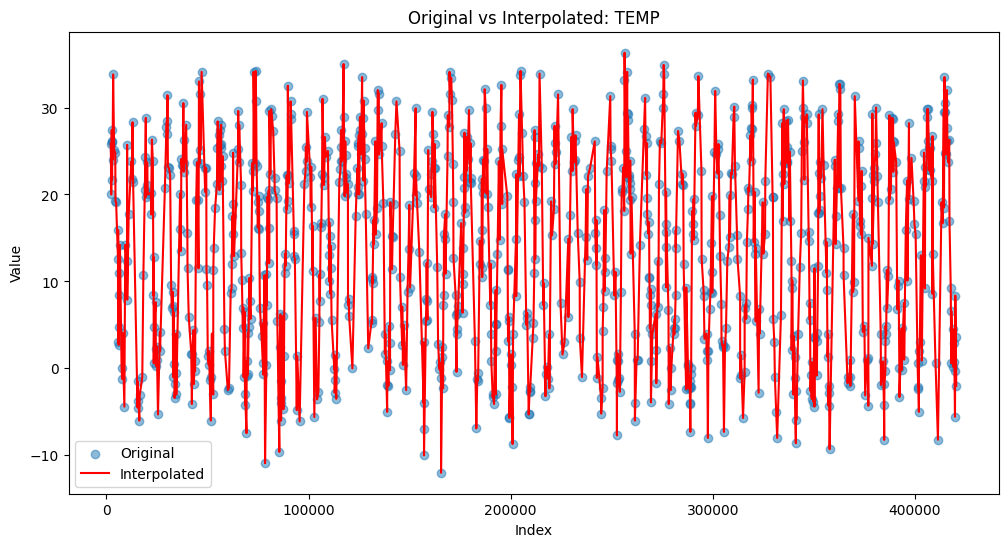

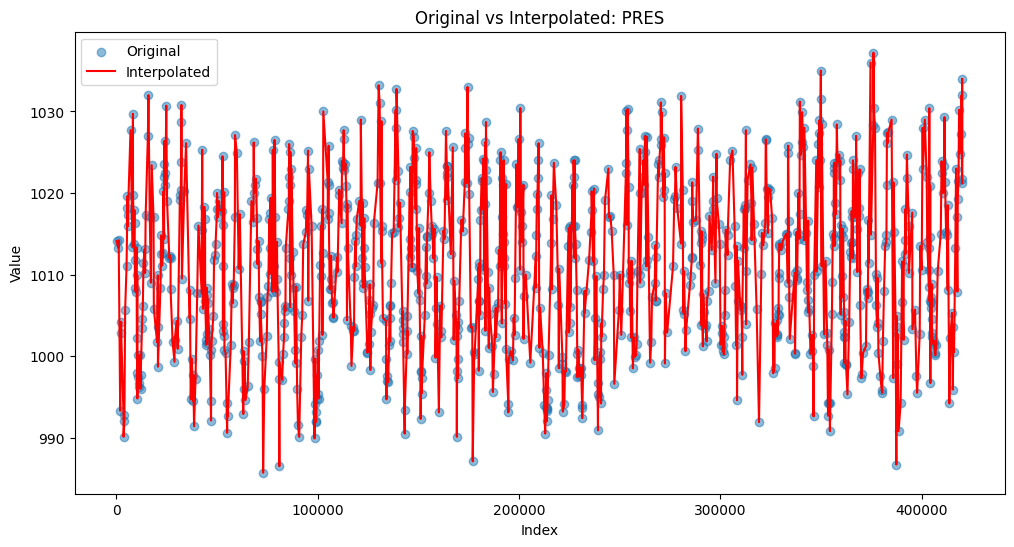

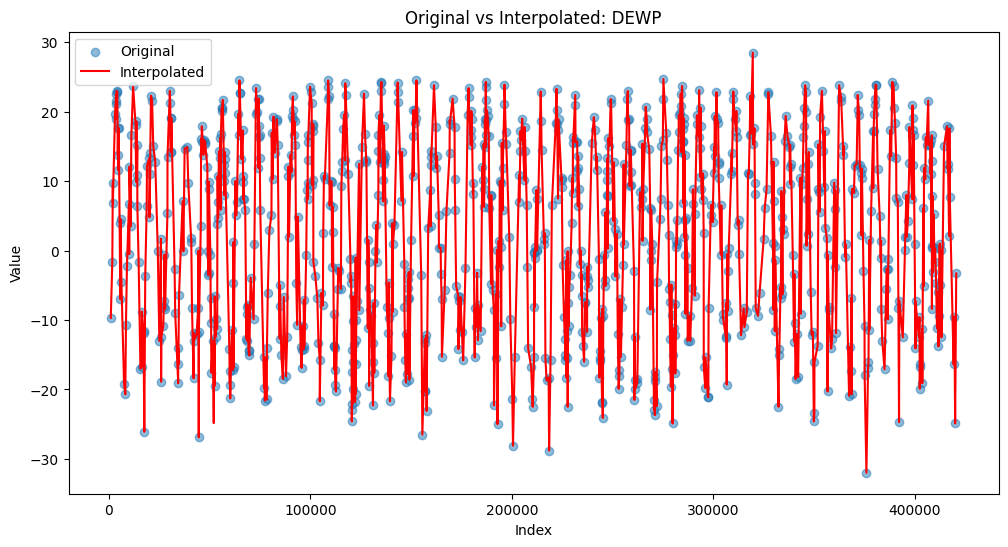

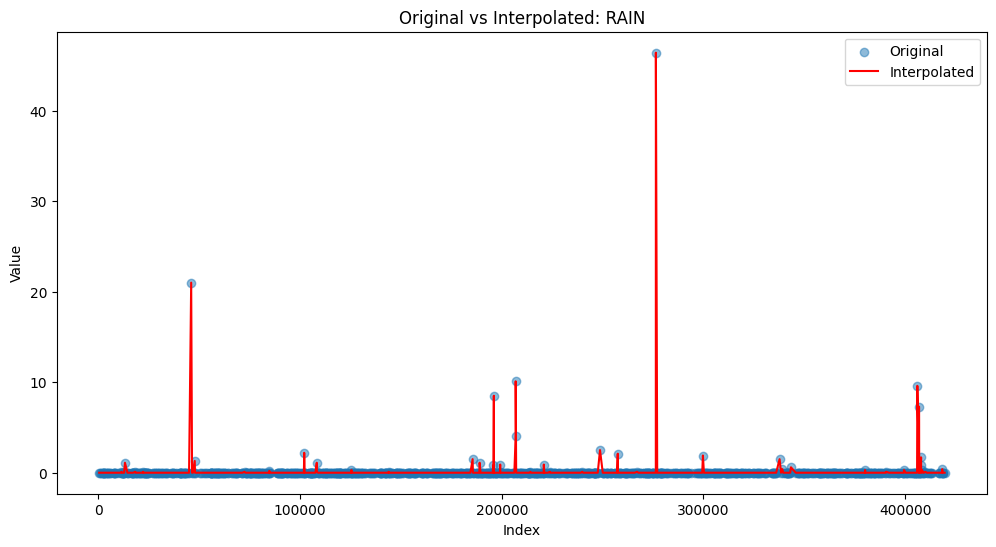

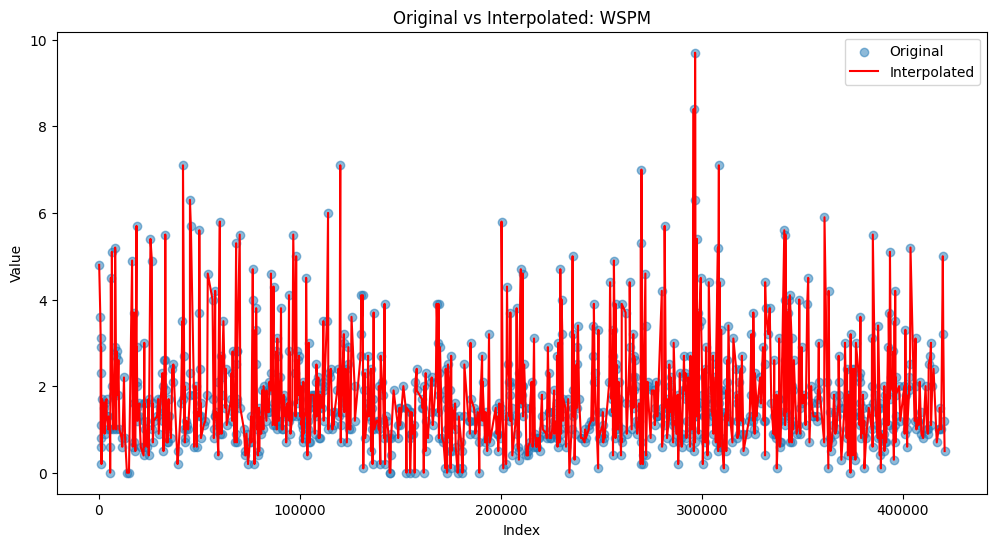

In [72]:
def plot_original_vs_interpolated(AllData_Combined_df, column, n_samples=1000): # Scatter plot interpolated & original
    sample = AllData_Combined_df.sample(n=min(n_samples, len(AllData_Combined_df)))

    sample = sample.sort_index()
    
    # Plot
    plt.figure(figsize=(12, 6))
    plt.scatter(sample.index, sample[column], alpha=0.5, label='Original')
    plt.plot(sample.index, sample[f"{column}_interpolated"], color='red', label='Interpolated')
    plt.title(f'Original vs Interpolated: {column}')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

columns_to_interpolate = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

for column in columns_to_interpolate:
    plot_original_vs_interpolated(AllData_Combined_df, column)

In [73]:
AllData_interpolated_df.isna().sum()

No                       0
year                     0
month                    0
day                      0
hour                     0
PM2.5_interpolated       0
PM10_interpolated        0
SO2_interpolated         0
NO2_interpolated         0
CO_interpolated          0
O3_interpolated          0
TEMP_interpolated        0
PRES_interpolated        0
DEWP_interpolated        0
RAIN_interpolated        0
wd                    1822
WSPM_interpolated        0
station                  0
Date                     0
dtype: int64

In [74]:
AllData_interpolated_df.describe()

,No,year,month,day,hour,PM2.5_interpolated,PM10_interpolated,SO2_interpolated,NO2_interpolated,CO_interpolated,O3_interpolated,TEMP_interpolated,PRES_interpolated,DEWP_interpolated,RAIN_interpolated,WSPM_interpolated,Date
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.837475,104.902640,15.913090,50.600220,1235.682649,57.237872,13.531692,1010.753337,2.482421,0.064428,1.730034,2015-03-01 00:00:00
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000,2013-03-01 00:00:00
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,10.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000,2014-03-01 00:00:00
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,44.000000,14.500000,1010.400000,3.000000,0.000000,1.400000,2015-03-01 00:00:00
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000,2016-02-29 00:00:00
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,957.000000,995.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000,2017-02-28 00:00:00
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.937823,92.397382,21.896609,35.170876,1161.790893,57.135195,11.437867,10.474302,13.797675,0.820638,1.246674,NaN


In [75]:
AllData_interpolated_df.head()

,No,year,month,day,hour,PM2.5_interpolated,PM10_interpolated,SO2_interpolated,NO2_interpolated,CO_interpolated,O3_interpolated,TEMP_interpolated,PRES_interpolated,DEWP_interpolated,RAIN_interpolated,wd,WSPM_interpolated,station,Date
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01


In [76]:
AllData_interpolated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   No                  420768 non-null  int64         
 1   year                420768 non-null  int64         
 2   month               420768 non-null  int64         
 3   day                 420768 non-null  int64         
 4   hour                420768 non-null  int64         
 5   PM2.5_interpolated  420768 non-null  float64       
 6   PM10_interpolated   420768 non-null  float64       
 7   SO2_interpolated    420768 non-null  float64       
 8   NO2_interpolated    420768 non-null  float64       
 9   CO_interpolated     420768 non-null  float64       
 10  O3_interpolated     420768 non-null  float64       
 11  TEMP_interpolated   420768 non-null  float64       
 12  PRES_interpolated   420768 non-null  float64       
 13  DEWP_interpolated   420768 no

**Insight:**
- Reformat year, month, day => Date (YYYY/MM/DD) dikenali sebagai datetime
- Missing value di semua kolom yang berjenis float, dilakukan interpolasi dengan metode spline, dengan hasil yang kemudian tersimpan pada AllData_interpolated. Serta, AllData_Combined yang berisikan AllData dan AllData_interpolated
- Hasil interpolasi menunjukkan cukup reliable yang ditunjukkan pada plot original vs interpolated (garis merah tidak terlalu buas untuk keluar dari titik warna biru)

## Exploratory Data Analysis (EDA)

### Explore kualitas udara, groupping => Good and Hazardous (PM2.5, PM10, SO2, CO, O3, NO2)

In [77]:
def categorize_air_quality(AllData_interpolated_df):
    # Kombinasi 'Date' dan 'hour' menjadi 'DateTime' sebagai index
    AllData_interpolated_df['DateTime'] = AllData_interpolated_df['Date'] + pd.to_timedelta(AllData_interpolated_df['hour'], unit='h')
    AllData_interpolated_df = AllData_interpolated_df.set_index('DateTime')
    
    # Mendifinisikan rerata berdasarkan beberapa kondisi sesuai batas air quality pada paper dari data yang telah diinterpolasi
    AllData_interpolated_df['PM10_day_avg'] = AllData_interpolated_df.groupby(AllData_interpolated_df.index.date)['PM10_interpolated'].transform('mean')
    AllData_interpolated_df['PM10_year_avg'] = AllData_interpolated_df.groupby(AllData_interpolated_df.index.year)['PM10_interpolated'].transform('mean')
    
    AllData_interpolated_df['PM2.5_day_avg'] = AllData_interpolated_df.groupby(AllData_interpolated_df.index.date)['PM2.5_interpolated'].transform('mean')
    AllData_interpolated_df['PM2.5_hour_avg'] = AllData_interpolated_df['PM2.5_interpolated']
    
    AllData_interpolated_df['SO2_hour_avg'] = AllData_interpolated_df['SO2_interpolated']
    AllData_interpolated_df['SO2_day_avg'] = AllData_interpolated_df.groupby(AllData_interpolated_df.index.date)['SO2_interpolated'].transform('mean')
    AllData_interpolated_df['SO2_year_avg'] = AllData_interpolated_df.groupby(AllData_interpolated_df.index.year)['SO2_interpolated'].transform('mean')
    
    AllData_interpolated_df['CO_hour_avg'] = AllData_interpolated_df['CO_interpolated']
    AllData_interpolated_df['CO_day_avg'] = AllData_interpolated_df.groupby(AllData_interpolated_df.index.date)['CO_interpolated'].transform('mean')
    
    AllData_interpolated_df['O3_hour_avg'] = AllData_interpolated_df['O3_interpolated']
    AllData_interpolated_df['O3_8hour_avg'] = AllData_interpolated_df['O3_interpolated'].rolling(window=8, min_periods=1).mean()
    
    AllData_interpolated_df['NO2_hour_avg'] = AllData_interpolated_df['NO2_interpolated']
    AllData_interpolated_df['NO2_day_avg'] = AllData_interpolated_df.groupby(AllData_interpolated_df.index.date)['NO2_interpolated'].transform('mean')
    AllData_interpolated_df['NO2_year_avg'] = AllData_interpolated_df.groupby(AllData_interpolated_df.index.year)['NO2_interpolated'].transform('mean')
    
    # Membuat definisi berdasarkan ambang batas/limit air quality
    conditions = {
        'PM10_hour_quality': AllData_interpolated_df['PM10_interpolated'] <= 150,  # Hourly limit for PM10
        'PM10_day_quality': (AllData_interpolated_df['PM10_day_avg'] <= 70) & (AllData_interpolated_df['PM10_day_avg']),
        'PM10_year_quality': (AllData_interpolated_df['PM10_year_avg'] <= 70) & (AllData_interpolated_df['PM10_year_avg']),
        
        'PM2.5_hour_quality': AllData_interpolated_df['PM2.5_interpolated'] <= 75,
        'PM2.5_day_quality': (AllData_interpolated_df['PM2.5_day_avg'] <= 35) & (AllData_interpolated_df['PM2.5_day_avg']),
        
        'SO2_hour_quality': AllData_interpolated_df['SO2_hour_avg'] <= 500,
        'SO2_day_quality': (AllData_interpolated_df['SO2_day_avg'] <= 450) & (AllData_interpolated_df['SO2_day_avg']),
        'SO2_year_quality': (AllData_interpolated_df['SO2_year_avg'] <= 60) & (AllData_interpolated_df['SO2_year_avg']),
        
        'CO_hour_quality': AllData_interpolated_df['CO_hour_avg'] <= 10000,
        'CO_day_quality': (AllData_interpolated_df['CO_day_avg'] <= 4000) & (AllData_interpolated_df['CO_day_avg']),
        
        'O3_hour_quality': (AllData_interpolated_df['O3_hour_avg'] <= 160),
        'O3_8hour_quality': (AllData_interpolated_df['O3_8hour_avg'] <= 160),
        
        'NO2_hour_quality': AllData_interpolated_df['NO2_hour_avg'] <= 200,
        'NO2_day_quality': (AllData_interpolated_df['NO2_day_avg'] <= 80) & (AllData_interpolated_df['NO2_day_avg']),
        'NO2_year_quality': (AllData_interpolated_df['NO2_year_avg'] <= 40) & (AllData_interpolated_df['NO2_year_avg'])
    }
    
    # Membuat parameter air quality => 1 = good; 0 = hazardous
    for param, condition in conditions.items():
        AllData_interpolated_df[param] = np.where(condition, 1, 0)

    # Summary air quality berdasarkan ambang batas dan parameter terkait
    AllData_interpolated_df['AirQuality'] = np.where(
        (AllData_interpolated_df[['PM10_hour_quality', 'PM10_day_quality', 'PM10_year_quality']].sum(axis=1) > 0) &
        (AllData_interpolated_df[['PM2.5_hour_quality', 'PM2.5_day_quality']].sum(axis=1) > 0) &
        (AllData_interpolated_df[['SO2_hour_quality', 'SO2_day_quality', 'SO2_year_quality']].sum(axis=1) > 0) &
        (AllData_interpolated_df[['CO_hour_quality', 'CO_day_quality']].sum(axis=1) > 0) &
        (AllData_interpolated_df[['O3_hour_quality', 'O3_8hour_quality']].sum(axis=1) > 0) &
        (AllData_interpolated_df[['NO2_hour_quality', 'NO2_day_quality', 'NO2_year_quality']].sum(axis=1) > 0)
    , 1, 0)
    
    # reset index
    AllData_interpolated_df = AllData_interpolated_df.reset_index()
    
    return AllData_interpolated_df

AllData_interpolated_df = categorize_air_quality(AllData_interpolated_df)

# Summary air quality dari semua station
good_percentage = (AllData_interpolated_df['AirQuality'].sum() / len(AllData_interpolated_df)) * 100
print(f"Percentage of hours with Good air quality: {good_percentage:.2f}%")

Percentage of hours with Good air quality: 58.29%


In [78]:
# Groupping berdasarkan station
station_quality_percentage = AllData_interpolated_df.groupby('station').agg(
    total_hours=('AirQuality', 'size'),
    good_hours=('AirQuality', 'sum')
)

# Persentase good air quality
station_quality_percentage['GoodPercentage'] = (station_quality_percentage['good_hours'] / station_quality_percentage['total_hours']) * 100

# Reset index
station_quality_percentage = station_quality_percentage.reset_index()

station_quality_percentage['GoodPercentage'] = station_quality_percentage['GoodPercentage'].round(2)
print(station_quality_percentage[['station', 'total_hours', 'good_hours', 'GoodPercentage']])


          station  total_hours  good_hours  GoodPercentage
0    Aotizhongxin        35064       19807           56.49
1       Changping        35064       22037           62.85
2        Dingling        35064       22909           65.33
3          Dongsi        35064       19429           55.41
4        Guanyuan        35064       19742           56.30
5         Gucheng        35064       19234           54.85
6         Huairou        35064       22314           63.64
7    Nongzhanguan        35064       19621           55.96
8          Shunyi        35064       20800           59.32
9         Tiantan        35064       20001           57.04
10         Wanliu        35064       19835           56.57
11  Wanshouxigong        35064       19522           55.68


### Explore kualitas udara, Parameter (PRES, TEMP, DEWP, RAIN, WSPM)

In [79]:
def calculate_parameter_averages(AllData_interpolated_df):
    AllData_interpolated_df['DateTime'] = AllData_interpolated_df['Date'] + pd.to_timedelta(AllData_interpolated_df['hour'], unit='h')
    AllData_interpolated_df = AllData_interpolated_df.set_index('DateTime')
    
    # Average hourly 
    AllData_interpolated_df['TEMP_hour_avg'] = AllData_interpolated_df['TEMP_interpolated']
    AllData_interpolated_df['PRES_hour_avg'] = AllData_interpolated_df['PRES_interpolated']
    AllData_interpolated_df['DEWP_hour_avg'] = AllData_interpolated_df['DEWP_interpolated']
    AllData_interpolated_df['RAIN_hour_avg'] = AllData_interpolated_df['RAIN_interpolated']
    AllData_interpolated_df['WSPM_hour_avg'] = AllData_interpolated_df['WSPM_interpolated']
    
    # Average daily 
    AllData_interpolated_df['TEMP_day_avg'] = AllData_interpolated_df.groupby(AllData_interpolated_df.index.date)['TEMP_interpolated'].transform('mean')
    AllData_interpolated_df['PRES_day_avg'] = AllData_interpolated_df.groupby(AllData_interpolated_df.index.date)['PRES_interpolated'].transform('mean')
    AllData_interpolated_df['DEWP_day_avg'] = AllData_interpolated_df.groupby(AllData_interpolated_df.index.date)['DEWP_interpolated'].transform('mean')
    AllData_interpolated_df['RAIN_day_avg'] = AllData_interpolated_df.groupby(AllData_interpolated_df.index.date)['RAIN_interpolated'].transform('mean')
    AllData_interpolated_df['WSPM_day_avg'] = AllData_interpolated_df.groupby(AllData_interpolated_df.index.date)['WSPM_interpolated'].transform('mean')
    
    # Average annually
    AllData_interpolated_df['TEMP_year_avg'] = AllData_interpolated_df.groupby(AllData_interpolated_df.index.year)['TEMP_interpolated'].transform('mean')
    AllData_interpolated_df['PRES_year_avg'] = AllData_interpolated_df.groupby(AllData_interpolated_df.index.year)['PRES_interpolated'].transform('mean')
    AllData_interpolated_df['DEWP_year_avg'] = AllData_interpolated_df.groupby(AllData_interpolated_df.index.year)['DEWP_interpolated'].transform('mean')
    AllData_interpolated_df['RAIN_year_avg'] = AllData_interpolated_df.groupby(AllData_interpolated_df.index.year)['RAIN_interpolated'].transform('mean')
    AllData_interpolated_df['WSPM_year_avg'] = AllData_interpolated_df.groupby(AllData_interpolated_df.index.year)['WSPM_interpolated'].transform('mean')
    
    # Reset index
    AllData_interpolated_df = AllData_interpolated_df.reset_index()
    
    return AllData_interpolated_df

AllData_interpolated_df = calculate_parameter_averages(AllData_interpolated_df)

(AllData_interpolated_df[['DateTime', 'TEMP_hour_avg', 'TEMP_day_avg', 'TEMP_year_avg',
                                 'PRES_hour_avg', 'PRES_day_avg', 'PRES_year_avg',
                                 'DEWP_hour_avg', 'DEWP_day_avg', 'DEWP_year_avg',
                                 'RAIN_hour_avg', 'RAIN_day_avg', 'RAIN_year_avg',
                                 'WSPM_hour_avg', 'WSPM_day_avg', 'WSPM_year_avg']].head())

,DateTime,TEMP_hour_avg,TEMP_day_avg,TEMP_year_avg,PRES_hour_avg,PRES_day_avg,PRES_year_avg,DEWP_hour_avg,DEWP_day_avg,DEWP_year_avg,RAIN_hour_avg,RAIN_day_avg,RAIN_year_avg,WSPM_hour_avg,WSPM_day_avg,WSPM_year_avg
0,2013-03-01 00:00:00,-0.7,1.173958,15.690783,1023.0,1026.569792,1007.733564,-18.8,-20.148611,5.475388,0.0,0.0,0.066097,4.4,2.917708,1.599066
1,2013-03-01 01:00:00,-1.1,1.173958,15.690783,1023.2,1026.569792,1007.733564,-18.2,-20.148611,5.475388,0.0,0.0,0.066097,4.7,2.917708,1.599066
2,2013-03-01 02:00:00,-1.1,1.173958,15.690783,1023.5,1026.569792,1007.733564,-18.2,-20.148611,5.475388,0.0,0.0,0.066097,5.6,2.917708,1.599066
3,2013-03-01 03:00:00,-1.4,1.173958,15.690783,1024.5,1026.569792,1007.733564,-19.4,-20.148611,5.475388,0.0,0.0,0.066097,3.1,2.917708,1.599066
4,2013-03-01 04:00:00,-2.0,1.173958,15.690783,1025.2,1026.569792,1007.733564,-19.5,-20.148611,5.475388,0.0,0.0,0.066097,2.0,2.917708,1.599066


In [80]:
AllData_interpolated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 65 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   DateTime            420768 non-null  datetime64[ns]
 1   No                  420768 non-null  int64         
 2   year                420768 non-null  int64         
 3   month               420768 non-null  int64         
 4   day                 420768 non-null  int64         
 5   hour                420768 non-null  int64         
 6   PM2.5_interpolated  420768 non-null  float64       
 7   PM10_interpolated   420768 non-null  float64       
 8   SO2_interpolated    420768 non-null  float64       
 9   NO2_interpolated    420768 non-null  float64       
 10  CO_interpolated     420768 non-null  float64       
 11  O3_interpolated     420768 non-null  float64       
 12  TEMP_interpolated   420768 non-null  float64       
 13  PRES_interpolated   420768 no

In [81]:
AllData_interpolated_df.describe()

,DateTime,No,year,month,day,hour,PM2.5_interpolated,PM10_interpolated,SO2_interpolated,NO2_interpolated,...,TEMP_day_avg,PRES_day_avg,DEWP_day_avg,RAIN_day_avg,WSPM_day_avg,TEMP_year_avg,PRES_year_avg,DEWP_year_avg,RAIN_year_avg,WSPM_year_avg
count,420768,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,...,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000
mean,2015-03-01 11:30:00.000001024,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.837475,104.902640,15.913090,50.600220,...,13.531692,1010.753337,2.482421,0.064428,1.730034,13.531692,1010.753337,2.482421,0.064428,1.730034
min,2013-03-01 00:00:00,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,...,-15.064236,988.493403,-32.415278,0.000000,0.640972,0.366012,1007.733564,-13.456594,0.002813,1.599066
25%,2014-03-01 05:45:00,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,...,2.977083,1002.255903,-9.104861,0.000000,1.242361,13.414439,1010.641660,2.173641,0.049832,1.637825
50%,2015-03-01 11:30:00,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,...,15.046875,1010.699306,2.771875,0.000000,1.542708,13.582987,1011.128864,2.600430,0.075975,1.772920
75%,2016-02-29 17:15:00,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,...,23.462500,1019.184722,15.020139,0.001389,2.042708,13.915571,1011.222679,2.741310,0.075975,1.844786
max,2017-02-28 23:00:00,35064.000000,2017.000000,12.000000,31.000000,23.000000,957.000000,995.000000,500.000000,290.000000,...,32.095139,1038.312847,26.588194,8.725694,5.375694,15.690783,1021.871409,5.475388,0.076008,2.002578
std,NaN,10122.116943,1.177198,3.448707,8.800102,6.922195,80.937823,92.397382,21.896609,35.170876,...,10.816852,10.019011,13.511102,0.303441,0.703497,2.831455,2.644868,3.489955,0.016554,0.111690


**Insight:**
- Reformat Date dan hour menjadi index  untuk membantu perhitungan lebih lanjut
- Groupping air quality => good & hazardous berdasarkan kondisi rerata sbb:
   A = Average   h = hour   Y = Year
  (PM2.5 => 1h A = 75   ; 24h A = 45)
  (PM10  =>               24h A = 150  ; Y A = 70)
  (SO2   => 1h A = 500  ; 24h A = 450  ; Y A = 60)
  (NO2   => 1h A = 2000 ; 24h A = 80   ; Y A = 40)
  (CO    => 1h A = 4000 ; 24h A = 10000)
  (O3    => 1h A = 200  ; 8h max = 160)
- Melakukan perhitungan PRES, TEMP, DEWP, RAIN, dan WSPM dengan mereratakan parameter tersebut (hourly, daily, and annually)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa nilai polutan tertinggi (hour, day, and year average) dan station mana yang memiliki nilai tersebut?

In [82]:
def get_time_range(row, pollutant):
    if 'hour avg' in pollutant:
        start_time = row['DateTime']
        end_time = start_time + pd.Timedelta(hours=1)
    elif 'day avg' in pollutant:
        start_time = row['DateTime'].replace(hour=0, minute=0, second=0)
        end_time = start_time + pd.Timedelta(days=1)
    elif 'year avg' in pollutant:
        start_time = row['DateTime'].replace(month=1, day=1, hour=0, minute=0, second=0)
        end_time = start_time + pd.Timedelta(days=365)
    elif '8hour avg' in pollutant:
        start_time = row['DateTime']
        end_time = start_time + pd.Timedelta(hours=8)
    else:
        start_time = row['DateTime']
        end_time = start_time
    
    return f"{start_time.strftime('%d-%m-%Y %H:%M')} - {end_time.strftime('%d-%m-%Y %H:%M')}"

# List polutan yang dipilih dan variabel perhitungannya (hour, day, and year average)
pollutants = {
    'PM10 (day avg)': 'PM10_day_avg',
    'PM10 (year avg)': 'PM10_year_avg',
    'PM2.5 (hour avg)': 'PM2.5_hour_avg',
    'PM2.5 (day avg)': 'PM2.5_day_avg',
    'SO2 (hour avg)': 'SO2_hour_avg',
    'SO2 (day avg)': 'SO2_day_avg',
    'SO2 (year avg)': 'SO2_year_avg',
    'CO (hour avg)': 'CO_hour_avg',
    'CO (day avg)': 'CO_day_avg',
    'O3 (hour avg)': 'O3_hour_avg',
    'O3 (8hour avg)': 'O3_8hour_avg',
    'NO2 (hour avg)': 'NO2_hour_avg',
    'NO2 (day avg)': 'NO2_day_avg',
    'NO2 (year avg)': 'NO2_year_avg'
}

results = []

# Max dari masing-masing polutan
for pollutant_name, column_name in pollutants.items():
    max_value = AllData_interpolated_df[column_name].max()
    max_row = AllData_interpolated_df.loc[AllData_interpolated_df[column_name] == max_value].iloc[0]
    max_station = max_row['station']
    time_range = get_time_range(max_row, pollutant_name)
    results.append({
        'Pollutant': pollutant_name,
        'Value': max_value,
        'Station': max_station,
        'Time Event': time_range
    })

result_df = pd.DataFrame(results)

result_df = result_df.sort_values('Value', ascending=False)

print(result_df.to_string(index=False))

       Pollutant        Value      Station                          Time Event
   CO (hour avg) 10000.000000 Aotizhongxin 01-12-2015 06:00 - 01-12-2015 07:00
    CO (day avg)  7961.111111 Aotizhongxin 21-12-2016 00:00 - 22-12-2016 00:00
   O3 (hour avg)  1071.000000       Dongsi 15-08-2013 23:00 - 16-08-2013 00:00
  O3 (8hour avg)  1071.000000       Dongsi 17-08-2013 00:00 - 17-08-2013 01:00
PM2.5 (hour avg)   957.000000       Wanliu 08-02-2016 02:00 - 08-02-2016 03:00
  SO2 (hour avg)   500.000000      Gucheng 14-05-2014 16:00 - 14-05-2014 17:00
  PM10 (day avg)   495.888889 Aotizhongxin 01-01-2017 00:00 - 02-01-2017 00:00
 PM2.5 (day avg)   473.050347 Aotizhongxin 01-12-2015 00:00 - 02-12-2015 00:00
  NO2 (hour avg)   290.000000 Aotizhongxin 16-10-2015 20:00 - 16-10-2015 21:00
   NO2 (day avg)   153.253472 Aotizhongxin 21-12-2016 00:00 - 22-12-2016 00:00
   SO2 (day avg)   128.687500 Aotizhongxin 23-02-2014 00:00 - 24-02-2014 00:00
 PM10 (year avg)   116.812391 Aotizhongxin 01-01-201

In [83]:
result_df.head(15).style.hide(axis="index")

Pollutant,Value,Station,Time Event
CO (hour avg),10000.000000,Aotizhongxin,01-12-2015 06:00 - 01-12-2015 07:00
CO (day avg),7961.111111,Aotizhongxin,21-12-2016 00:00 - 22-12-2016 00:00
O3 (hour avg),1071.000000,Dongsi,15-08-2013 23:00 - 16-08-2013 00:00
O3 (8hour avg),1071.000000,Dongsi,17-08-2013 00:00 - 17-08-2013 01:00
PM2.5 (hour avg),957.000000,Wanliu,08-02-2016 02:00 - 08-02-2016 03:00
SO2 (hour avg),500.000000,Gucheng,14-05-2014 16:00 - 14-05-2014 17:00
PM10 (day avg),495.888889,Aotizhongxin,01-01-2017 00:00 - 02-01-2017 00:00
PM2.5 (day avg),473.050347,Aotizhongxin,01-12-2015 00:00 - 02-12-2015 00:00
NO2 (hour avg),290.000000,Aotizhongxin,16-10-2015 20:00 - 16-10-2015 21:00
NO2 (day avg),153.253472,Aotizhongxin,21-12-2016 00:00 - 22-12-2016 00:00


**Insight:**
- Nilai polutan tertinggi untuk CO, PM10, PM2.5, dan NO2 (hourly, daily, and annually), serta SO2 (annually) berada di Station Aotizhongxin dengan nilai masing-masing polutan sebagai berikut:
  1. CO = 10000.00 (hour avg); 	7961.1 (day avg)
  2. PM10 = 495.89 (day avg); 116.812391 (year avg)
  3. 
PM2. = 	473.05034 (day avg)
  4. 
N = )	290. (hour avg); g)	153 (day avg); 57.22 (year avg)
  5. 00 = vg)	19 (day avg); r avg (year avg)
- Sedangkan memiliki nilai polutan O3 dengan rerata (hour and tertinggi berada pada Station Dongsi dengan nilai masing-masing 1071 8 hours). Sementan
 polutan SO2 (Annually) tertinggi bSrada di statio debngan nilai 500n Terakhir, polutan PM2.5 (hour) berada di Station Wanliu dengan nilai 957 Gucheng.

### Pertanyaan 2: Apa pengaruh kecepatan angin (WSPM) terhadap polutan (NO2 dan PM10)? 

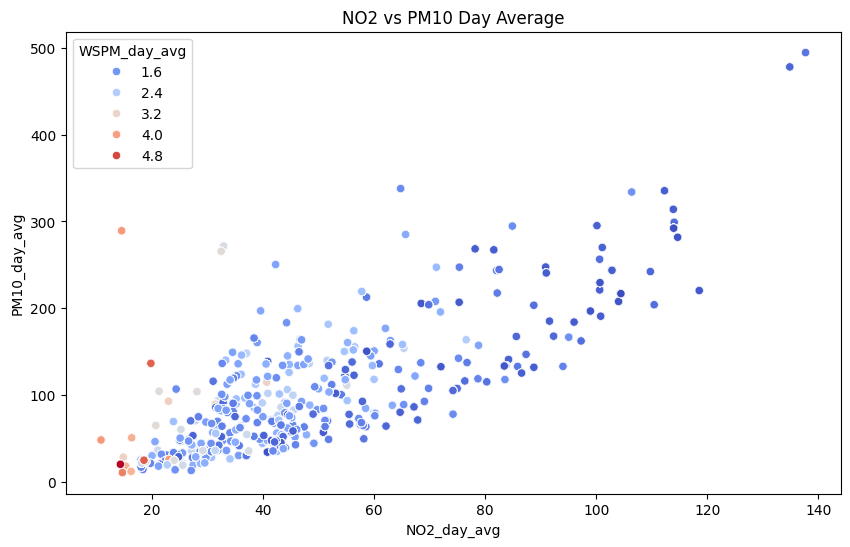

In [84]:
#Filter data => 2015
df_2015 = AllData_interpolated_df[(AllData_interpolated_df['DateTime'] >= '2015-01-01') & 
                                  (AllData_interpolated_df['DateTime'] <= '2015-12-31')]

# Pemilihan parameter & polutan
df_2015_avg = df_2015[['O3_8hour_avg', 'NO2_day_avg', 'PM10_day_avg', 'SO2_day_avg', 'TEMP_day_avg', 'RAIN_day_avg', 'DEWP_day_avg', 'WSPM_day_avg']]

# Scatterplot
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='NO2_day_avg', y='PM10_day_avg', hue = 'WSPM_day_avg', palette='coolwarm', data=df_2015_avg)
plt.title('NO2 vs PM10 Day Average')
plt.xlabel('NO2_day_avg')
plt.ylabel('PM10_day_avg')

scatter.legend(title='WSPM_day_avg')

plt.show()


**Insight:**
- Semakin tinggi kecepatan angin (WSPM) menyebabkan polutan PM10 dan NO2 mudah terurai yang ditunjukkan dengan rendahnya tingkat polutan tersebut. Hal ini ditunjukkan oleh warna merah yang tersebar berkumpul pada nilai polutan PM10 dan NO2 rendah, sementara menuju warna biru, polutan PM10 dan NO2 relatif semakin tinggi. 

## Analisis Lanjutan (Opsional) => Persentase Good Air Quality masing-masing station berdasarkan ambang batas masing-masing polutan

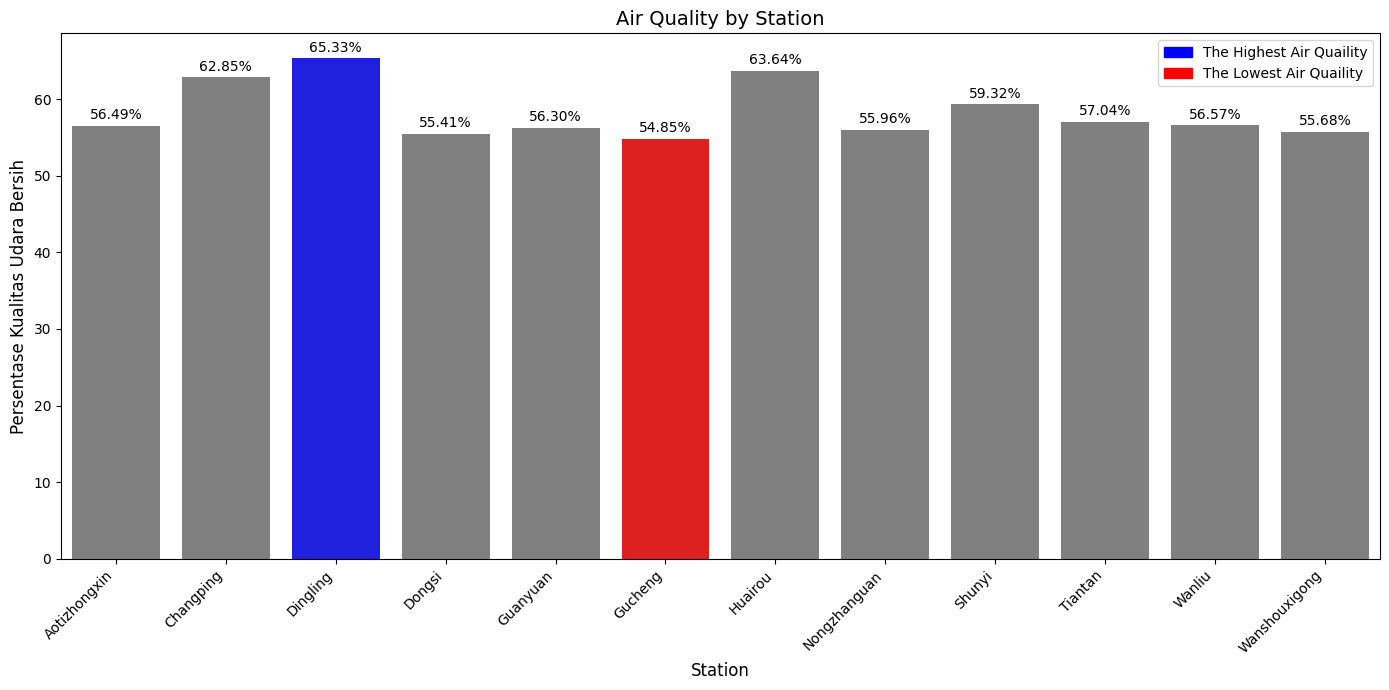

In [85]:
sorted_data = station_quality_percentage.sort_values('station')

# custom warna (colors) barplot
colors = ['grey'] * len(sorted_data)
max_index = sorted_data['GoodPercentage'].idxmax()
min_index = sorted_data['GoodPercentage'].idxmin()

for i in range(len(sorted_data)):
    if sorted_data.index[i] == max_index:
        colors[i] = 'blue'
    elif sorted_data.index[i] == min_index:
        colors[i] = 'red'

# Tampilan Barplot
plt.figure(figsize=(14, 7))
ax = sns.barplot(x='station', y='GoodPercentage', data=sorted_data, palette=colors, hue = 'station', legend=False)

plt.xlabel('Station', fontsize=12)
plt.ylabel('Persentase Kualitas Udara Bersih', fontsize=12)
plt.title('Air Quality by Station', fontsize=14)
plt.xticks(rotation=45, ha='right')

for index, row in sorted_data.iterrows():
    ax.text(index, row['GoodPercentage'] + 0.5, f'{row["GoodPercentage"]:.2f}%', 
            color='black', ha="center", va="bottom", fontsize=10)

# Custom legend
blue_ = mpatches.Patch(color='blue', label='The Highest Air Quaility')
red_ = mpatches.Patch(color='red', label='The Lowest Air Quaility')

plt.legend(handles=[blue_, red_], loc='upper right')

plt.tight_layout()
plt.show()


**Insight:**
- Kualitas udara dengan total persentase kualitas udara sehat tertinggi berada di Station Dingling dengan presentase kualitas udara sehat yaitu 65.33%. Sementara, kualitas udara dengan presentase kualitas udara sehat terendah yaitu di Station Gucheng dengan presentase 54.85%

**Note:**
  Definisi kualitas udara sehat yaitu udara dengan batas polutan sebagai berikut:
  - A = Average   h = hour   Y = Year
  1. (PM2.5 => 1h A = 75   ; 24h A = 45)
  2. (PM10  =>               24h A = 150  ; Y A = 70)
  3. (SO2   => 1h A = 500  ; 24h A = 450  ; Y A = 60)
  4. (NO2   => 1h A = 2000 ; 24h A = 80  ; Y A = 40)
  5. (CO    => 1h A = 4000 ; 24h A = 10000)
  6. (O3    => 1h A = 200  ; 8h max = 160)

## Conclusion

- Nilai polutan tertinggi untuk CO, PM10, PM2.5, dan NO2 (hourly, daily, and annually), serta SO2 (annually) berada di Station Aotizhongxin dengan nilai masing-masing polutan sebagai berikut:
  1. CO = 10000.00 (hour avg); 7961.11 (day avg)
  2. PM10 = 495.89 (day avg); 116.812391 (year avg)
  3. PM2.5 = 473.050347 (day avg)
  4. NO2 = 290.00 (hour avg); 153.25 (day avg); 57.22 (year avg)
  5. SO2 = 128.69 (day avg); 21.20 (year avg)
Sedangkan nilai polutan O3 dengan rerata (hour and 8 hours) tertinggi berada pada Station Dongsi dengan nilai masing-masing 1071. Sementara polutan
SO2 (Annually) tertinggi berada di Station Gucheng debngan nilai 500. Terakhir, polutan PM2.5 (hour) berada di Station Wanliu dengan nilai 957
- Semakin tinggi kecepatan angin (WSPM) menyebabkan polutan PM10 dan NO2 mudah terurai yang ditunjukkan dengan rendahnya tingkat polutan tersebut. Hal ini ditunjukkan oleh warna merah yang tersebar berkumpul pada nilai polutan PM10 dan NO2 rendah, sementara menuju warna biru, polutan PM10 dan NO2 relatif semakin tinggi. 

In [86]:
AllData_interpolated_df.to_csv("final_airquality.csv", index=False)